# Exercise 1: 
## a) Compute the correlation between mean salary and year.
## b) Generate a graph of mean salary per year.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [27]:
batting = pd.read_csv('batting.csv')
players = pd.read_csv('player.csv')
teams = pd.read_csv('team.csv')

In [20]:
salary = pd.read_csv("salary.csv")
salary.head()

,year,team_id,league_id,player_id,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [23]:
mean_year = salary.groupby('year').salary.mean().reset_index()
mean_year.corr()

,year,salary
year,1.000000,0.983687
salary,0.983687,1.000000


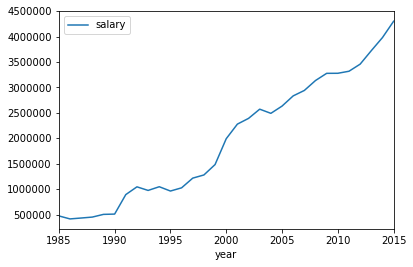

In [26]:
mean_year.plot(x='year', y='salary')

# Exercise 2: 
## a) Find the best line that approximates mean salary with respect to years. 
## b) Plot this line together with the data from exercise 1.

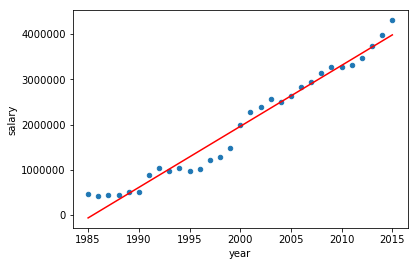

In [83]:
import statsmodels.formula.api as smf
results = smf.ols('salary ~ year', data=salary).fit()
mean_year.plot(x='year', y='salary', kind='scatter')
plt.plot(salary.year, results.fittedvalues, color='r')
plt.show()

# Exercise 3: Create a box plot for salaries per year.

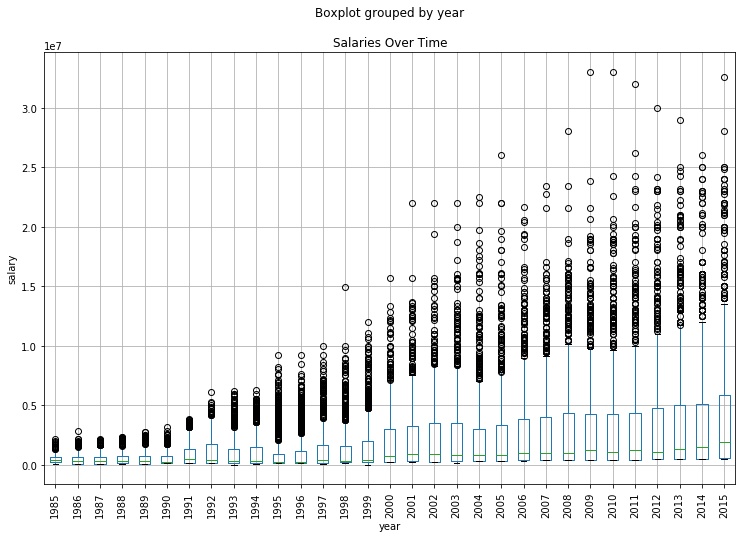

In [55]:
salary[['salary', 'year']].boxplot(by='year', rot=90, figsize=(12,8))
plt.ylabel('salary')
plt.xlabel('year')
plt.title('Salaries Over Time')
plt.show()

# Exercise 4: From the previous graph we can see an increasing disparity in salaries as time increases. 
## a) How would you measure disparity in salaries? 
## b) Compute the correlation of disparity and years.
## c) Find the best line that approximates disparity with respect to years.

In [59]:
# standard deviation:
salary.salary.std()

3315706.2063793293

In [65]:
var_year = salary.groupby('year').salary.std().reset_index()
var_year.sort_values('salary', ascending=False).head()

,year,salary
30,2015,5.506178e+06
29,2014,5.155339e+06
28,2013,4.963773e+06
27,2012,4.710311e+06
26,2011,4.541140e+06


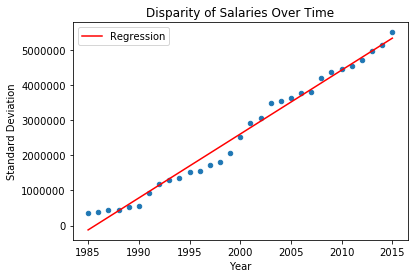

In [71]:
results = smf.ols('salary ~ year', data=var_year).fit()
var_year.plot(x='year', y='salary', kind='scatter')
plt.plot(var_year.year, results.fittedvalues, color='r', label='Regression')
plt.ylabel('Standard Deviation')
plt.xlabel('Year')
plt.title('Disparity of Salaries Over Time')
plt.legend()
plt.show()

# Exercise 5: 
## a) Build a predictive model for the amount of hits for a team given Games played, Wins, Walks by batters, At bats, Fielding  percentage, Outs Pitched (innings pitched x 3), Hits allowed, Earned runs allowed, Doubles. To solve this problem you will use team.csv. 

## b) How does your model measure accuracy?
## c) What was the score for its accuracy?
## d) Choose two features and create a 3d plot of feature1, feature2, h.

In [72]:
teams.head()

,year,league_id,team_id,franchise_id,div_id,rank,g,ghome,w,l,...,dp,fp,name,park,attendance,bpf,ppf,team_id_br,team_id_lahman45,team_id_retro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [73]:
teams.columns

Index(['year', 'league_id', 'team_id', 'franchise_id', 'div_id', 'rank', 'g',
       'ghome', 'w', 'l', 'div_win', 'wc_win', 'lg_win', 'ws_win', 'r', 'ab',
       'h', 'double', 'triple', 'hr', 'bb', 'so', 'sb', 'cs', 'hbp', 'sf',
       'ra', 'er', 'era', 'cg', 'sho', 'sv', 'ipouts', 'ha', 'hra', 'bba',
       'soa', 'e', 'dp', 'fp', 'name', 'park', 'attendance', 'bpf', 'ppf',
       'team_id_br', 'team_id_lahman45', 'team_id_retro'],
      dtype='object')

In [75]:
model = teams[['h', 'g', 'w', 'bb', 'ab', 'fp', 'ipouts', 'ha', 'er', 'double']]
#teams[['H', 'g', 'w', 'BB', 'AB', 'FP', 'IPOuts', 'HA', 'ER', '2B']]
model.corr()

,h,g,w,bb,ab,fp,ipouts,ha,er,double
h,1.000000,0.867794,0.725160,0.738454,0.919542,0.759347,0.862981,0.867496,0.737566,0.817653
g,0.867794,1.000000,0.676371,0.774200,0.986522,0.859709,0.996585,0.858471,0.703112,0.679297
w,0.725160,0.676371,1.000000,0.655929,0.689233,0.644387,0.697276,0.413214,0.235721,0.586949
bb,0.738454,0.774200,0.655929,1.000000,0.774027,0.738134,0.775540,0.696013,0.668003,0.646537
ab,0.919542,0.986522,0.689233,0.774027,1.000000,0.845304,0.984474,0.884420,0.742577,0.736695
fp,0.759347,0.859709,0.644387,0.738134,0.845304,1.000000,0.870880,0.717618,0.665051,0.711360
ipouts,0.862981,0.996585,0.697276,0.775540,0.984474,0.870880,1.000000,0.840879,0.682191,0.680553
ha,0.867496,0.858471,0.413214,0.696013,0.884420,0.717618,0.840879,1.000000,0.893517,0.722018
er,0.737566,0.703112,0.235721,0.668003,0.742577,0.665051,0.682191,0.893517,1.000000,0.735155
double,0.817653,0.679297,0.586949,0.646537,0.736695,0.711360,0.680553,0.722018,0.735155,1.000000


In [82]:
model.head()

,h,g,w,bb,ab,fp,ipouts,ha,er,double
0,426,31,20,60,1372,0.83,828,367,109,70
1,323,28,19,60,1196,0.82,753,308,77,52
2,328,29,10,26,1186,0.81,762,346,116,35
3,178,19,7,33,746,0.80,507,261,97,19
4,403,33,16,33,1404,0.83,879,373,121,43


In [88]:
form = 'h ~' + ' + '.join(model[1:])
#for form in form_list:
results = smf.ols(form, data=model).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      h   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.411e+28
Date:                Tue, 11 Jul 2017   Prob (F-statistic):               0.00
Time:                        17:10:11   Log-Likelihood:                 63898.
No. Observations:                2805   AIC:                        -1.278e+05
Df Residuals:                    2794   BIC:                        -1.277e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -2.16e-12   4.17e-11     -0.052      0.959   -8.39e-11    7.96e-11
h              1.0000   1.29e-14   7.77e+13      0.000       1.000       1.000
g           8.882e-16   3.66e-13      0.002      0.998   -7.17e-13    7.19e-13
w            7.55e-15    9.5e-14      0.079      0.937   -1.79e-13    1.94e-13
bb         -1.568e-15   8.87e-15     -0.177      0.860    -1.9e-14    1.58e-14
ab         -1.998e-15   9.18e-15     -0.218      0.828      -2e-14     1.6e-14
fp          2.615e-12   4.95e-11      0.053      0.958   -9.44e-11    9.96e-11
ipouts     -4.191e-15   1.49e-14     -0.282      0.778   -3.34e-14     2.5e-14
ha         -1.277e-15   1.12e-14     -0.114      0.909   -2.33e-14    2.07e-14
er         -1.665e-16   1.39e-14     -0.012      0.990   -2.74e-14    2.71e-14
double     -4.108e-15   2.13e-14     -0.193      0.847   -4.59e-14    3.77e-14
==============================================================================
Omnibus:                     1876.934   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19796.453
Skew:                          -3.166   Prob(JB):                         0.00
Kurtosis:                      14.371   Cond. No.                     7.64e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
form = ['h ~ ' + f for f in model.columns[1:]]
for predictor in form:
    results = smf.ols(predictor, data=model).fit()
    print(predictor.split(' ')[-1], results.pvalues[-1])
    #print(results.summary())

g 0.0
w 0.0
bb 0.0
ab 0.0
fp 0.0
ipouts 0.0
ha 0.0
er 0.0
double 0.0


In [92]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
x = model.drop('h', 1)
y = model.h
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

r squared is measured for accuracy. This model's score is:

In [93]:
lr.score(x, y)

0.95718636744623342

In [103]:
model.corr().sort_values('h', ascending=False).iloc[1:,:1]

,h
ab,0.919542
g,0.867794
ha,0.867496
ipouts,0.862981
double,0.817653
fp,0.759347
bb,0.738454
er,0.737566
w,0.725160


AB, G are the statistics highest correlated to H, so we'll graph those.

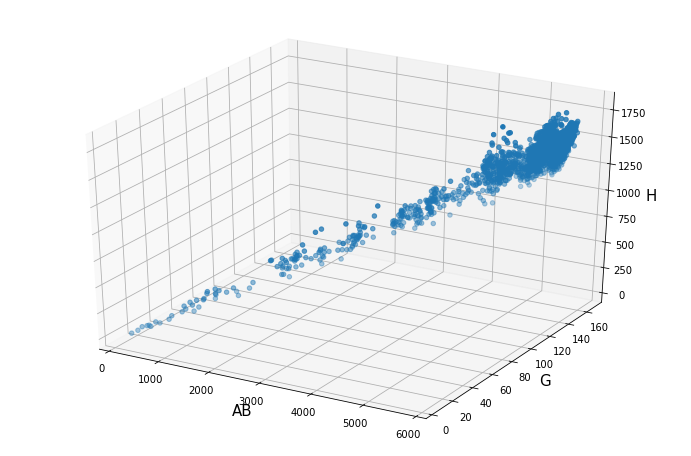

In [111]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(model.ab, model.g, model.h)
ax.set_xlabel('AB', size=15)
ax.set_ylabel('G', size=15)
ax.set_zlabel('H', size=15)
plt.show()

# Exercise 6: Build a similar model to predict average hits per year based on Games played, At bats and whether a player is a left or right handed batter. Consider only those players who are either left or right handed batters and for the moment do not worry about missing data or ambidextrous batters. 

In [113]:
batting.head()

,player_id,year,stint,team_id,league_id,g,ab,r,h,double,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


In [127]:
batting_concat = pd.merge(batting, players, on='player_id')
batting_concat.head()

,player_id,year,stint,team_id,league_id,g,ab,r,h,double,...,name_last,name_given,weight,height,bats,throws,debut,final_game,retro_id,bbref_id
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,Abercrombie,Francis Patterson,NaN,NaN,NaN,NaN,1871-10-21,1871-10-21,aberd101,abercda01
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,Addy,Robert Edward,160.0,68.0,L,L,1871-05-06,1877-10-06,addyb101,addybo01
2,addybo01,1873,1,PH2,NaN,10,51.0,12.0,16.0,1.0,...,Addy,Robert Edward,160.0,68.0,L,L,1871-05-06,1877-10-06,addyb101,addybo01
3,addybo01,1873,2,BS1,NaN,31,152.0,37.0,54.0,5.0,...,Addy,Robert Edward,160.0,68.0,L,L,1871-05-06,1877-10-06,addyb101,addybo01
4,addybo01,1874,1,HR1,NaN,50,213.0,25.0,51.0,9.0,...,Addy,Robert Edward,160.0,68.0,L,L,1871-05-06,1877-10-06,addyb101,addybo01


In [130]:
model = batting_concat[batting_concat['bats'] != 'both'][['h', 'g', 'ab', 'bats']].dropna()
model.head()

,h,g,ab,bats
1,32.0,25,118.0,L
2,16.0,10,51.0,L
3,54.0,31,152.0,L
4,51.0,50,213.0,L
5,80.0,69,310.0,L


In [174]:
model2 = batting_concat[batting_concat['bats'] != 'B'][['year', 'h', 'g', 'ab', 'bats']].dropna().reset_index()
model2.drop('index', 1, inplace=True)
model2['bats'] = model2['bats'].apply(lambda x: 1 if x == 'R' else 0)
model2.head()

,year,h,g,ab,bats
0,1871,32.0,25,118.0,0
1,1873,16.0,10,51.0,0
2,1873,54.0,31,152.0,0
3,1874,51.0,50,213.0,0
4,1875,80.0,69,310.0,0


In [177]:
data = model2.groupby('year')[model2.columns[1:]].mean().reset_index()
data.drop('year', 1, inplace=True)
data.head()

,h,g,ab,bats
0,35.382979,24.531915,116.659574,0.744681
1,44.634921,30.968254,148.936508,0.793651
2,56.375000,38.546875,184.828125,0.781250
3,60.910448,46.179104,214.014925,0.791045
4,46.495575,39.610619,173.522124,0.831858


In [178]:
x = data.drop('h', 1)
y = data.h
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [179]:
lr.score(x,y)

0.93998848922620182